<a href="https://colab.research.google.com/github/thanga-v2/stable-diffusion-with-python/blob/main/Stable_Diffusion_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SD is a DL process utilizes diffusion processes to generate high-quality artwork from guided instructions and images.


SD is an AI image generatio  technology.

other DL image generation models, such as OpneAI's DALL-E 2.



**Before transformers and attentions, convolutional neural networks (CNN) and Residual Neural Networks (ResNets) dominated the field of CV in machine learning.**

these two are used for object detection and face recognition. these two are widely used for slef driving cars and AI driven agriculture.

**Drawbacks : **

They can only detect the objects that are part of their traning set. in order to detect a completely new object, a new categeory label must be added to the training dataset, followed by retraining and fine-tuning.

Example -

Lets consider the following sentence as an example:

			“Stable Diffusion can generate images using text”

			Let’s say we input the sequence of words into the neural network, excluding the last word text:

			“Stable Diffusion can generate images using”

			Using this prompt, the model can predict the next word based on its current weights. Let’s say it predicts apple.

      The encoded embedding of the word apple is significantly different from text in terms of vector space, much like two numbers with a large gap between them.
      ** This gap value can be used as the loss value, which is then backpropagated to update the weights.**

			By repeating this process millions or even billions of times during training and updating, the model’s weights gradually learn to produce the next reasonable words in a sentence.

			Machine learning models can now learn a wide range of tasks with a properly designed loss function.”


**<!-- CLIP -->**

researchers from openAI read the attention is all you need white paper and created a model called CLIP that uses attention mechanism and transformer model architecture to train an image classification model.


“Using only CLIP, we still cannot generate a realistic image based on a text description. For instance, if we ask CLIP to draw an apple, the model merges various types of apples, different shapes, colors, backgrounds, and so on. CLIP might generate an apple that is half green and half red, which might not be what we intended.”




//


//


# Diffusion. what is diffusion ?

“The original meaning of diffusion is the movement of particles from a region of high concentration to a region of low concentration. This idea of diffusion inspired machine learning researchers to apply it to denoising and sampling processes. In other words, we can start with a noisy image and gradually refine it by removing noise. The denoising process gradually transforms an image with high levels of noise into a clearer version of the original image. Therefore, this generative model is referred to as a denoising diffusion probabilistic model.”




# Original git repo of stable diffusion - “https://github.com/CompVis/stable-diffusion”


In [1]:
!nvidia-smi

Thu Apr  3 08:29:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [3]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
prompt = "a chef wearing attire in mars, cooking pizzas, wind and sand movig back"

image = pipe(prompt, num_inference_steps=30, guidance_scale=2.5).images[0]
image.save("chef.png")

  0%|          | 0/30 [00:00<?, ?it/s]

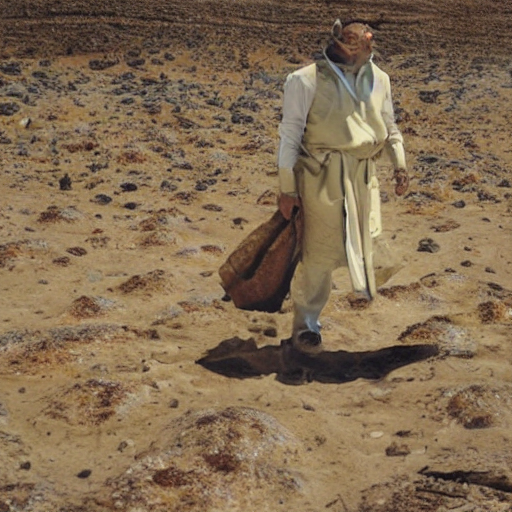

In [5]:
image